In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
df=pd.read_csv('laptop-price.csv').dropna()
df.head(5)

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   object 
 2   TypeName       1268 non-null   object 
 3   Ram            1268 non-null   int64  
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   int64  
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   object 
 10  HDD            1268 non-null   int64  
 11  SSD            1268 non-null   int64  
 12  Hybrid         1268 non-null   int64  
 13  Flash_Storage  1268 non-null   int64  
 14  Gpu brand      1268 non-null   object 
 15  os             1268 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 158.6+ KB


In [76]:
df.describe()

,index,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
count,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000,1268.000000
mean,652.887224,8.461356,2.080047,59924.981175,0.145110,0.282334,145.935819,415.741325,183.634069,9.075710,4.580442
std,376.581012,5.569898,0.806482,37340.350650,0.352351,0.450313,43.445969,517.152677,186.641125,93.825228,30.615945
min,0.000000,1.000000,0.690000,9270.720000,0.000000,0.000000,44.019462,0.000000,0.000000,0.000000,0.000000
25%,326.750000,4.000000,1.500000,31914.720000,0.000000,0.000000,127.335675,0.000000,0.000000,0.000000,0.000000
50%,652.500000,8.000000,2.040000,52107.840000,0.000000,0.000000,141.211998,0.000000,256.000000,0.000000,0.000000
75%,980.250000,8.000000,2.320000,79346.840400,0.000000,1.000000,157.350512,1000.000000,256.000000,0.000000,0.000000
max,1302.000000,64.000000,11.100000,324954.720000,1.000000,1.000000,352.465147,2000.000000,1024.000000,1000.000000,512.000000


In [77]:
df.head(3)

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux


In [78]:
df.drop(columns = ['index'],axis = 1,inplace = True)


In [79]:
state_map = {'Intel': 0, 'AMD': 1, 'Nvidia': 2}
df['Gpu brand'] = df['Gpu brand'].map(state_map)

In [80]:
df.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,0,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,0,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,0,Others/No OS/Linux


In [81]:
encoder = LabelEncoder()
df['TypeName'] = encoder.fit_transform(df['TypeName'])
df['Cpu brand'] = encoder.fit_transform(df['Cpu brand'])

In [82]:
df.head(3)


,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,4,8,1.37,71378.6832,0,1,226.983005,2,0,128,0,0,0,Mac
1,Apple,4,8,1.34,47895.5232,0,0,127.677940,2,0,0,0,128,0,Mac
2,HP,3,8,1.86,30636.0000,0,0,141.211998,2,0,256,0,0,0,Others/No OS/Linux


In [83]:

df['Company'] = encoder.fit_transform(df['Company'])

In [84]:
encoder = LabelEncoder()
df['os'] = encoder.fit_transform(df['os'])

In [85]:
df.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,1,4,8,1.37,71378.6832,0,1,226.983005,2,0,128,0,0,0,0
1,1,4,8,1.34,47895.5232,0,0,127.677940,2,0,0,0,128,0,0
2,7,3,8,1.86,30636.0000,0,0,141.211998,2,0,256,0,0,0,1


In [86]:
df['Company'].unique()

array([ 1,  7,  0,  2,  4, 10,  3, 11, 13, 16,  8, 18, 17, 14, 12, 15,  6,
        5,  9])

In [87]:
y=df["Price"]
x=df.drop("Price", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
scaler = StandardScaler()

In [88]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [99]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

y_pred = linear_model.predict(x_test_scaled)

In [100]:
import joblib
joblib.dump(linear_model, 'linear_model.pkl')
print("Model saved as 'linear_model.pkl'")

Model saved as 'linear_model.pkl'


In [90]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 458522807.1105875
R^2 Score: 0.6918347643421013


In [92]:
accuracy = linear_model.score(x_test_scaled, y_test)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.6918347643421013


In [105]:
loaded_model = joblib.load('linear_model.pkl')
accuracy2 = loaded_model.score(x_test_scaled, y_test)
print(f"Accuracy Score: {accuracy2}")

Accuracy Score: 0.6918347643421013


In [93]:
import warnings
warnings.filterwarnings('ignore')

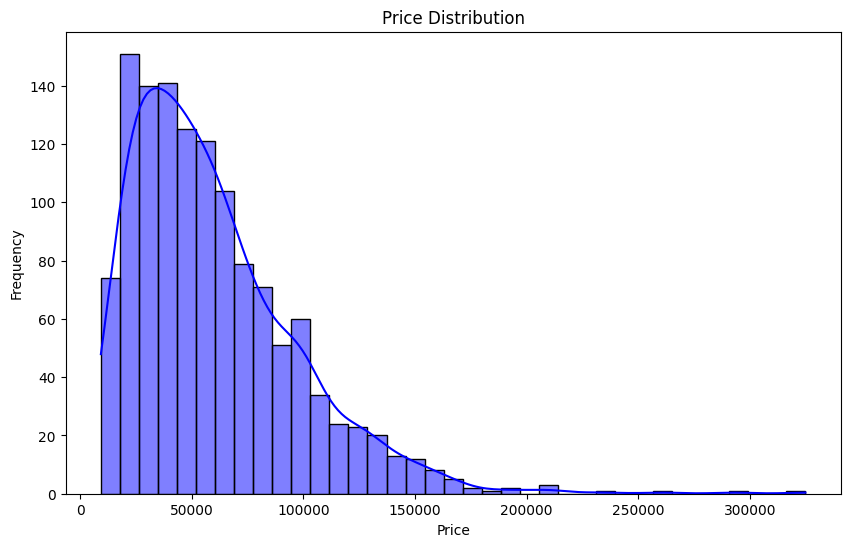

In [94]:
#histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

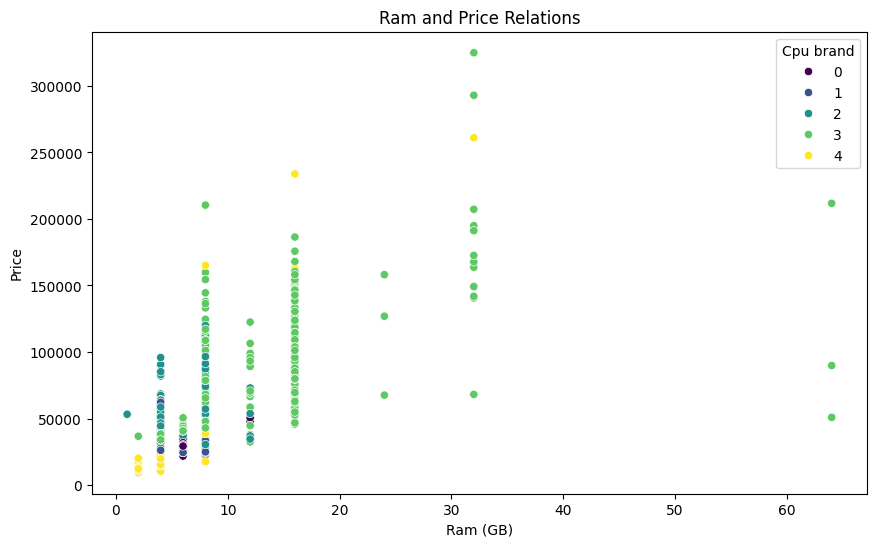

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ram', y='Price', hue='Cpu brand', palette='viridis')
plt.title('Ram and Price Relations')
plt.xlabel('Ram (GB)')
plt.ylabel('Price')
plt.show()

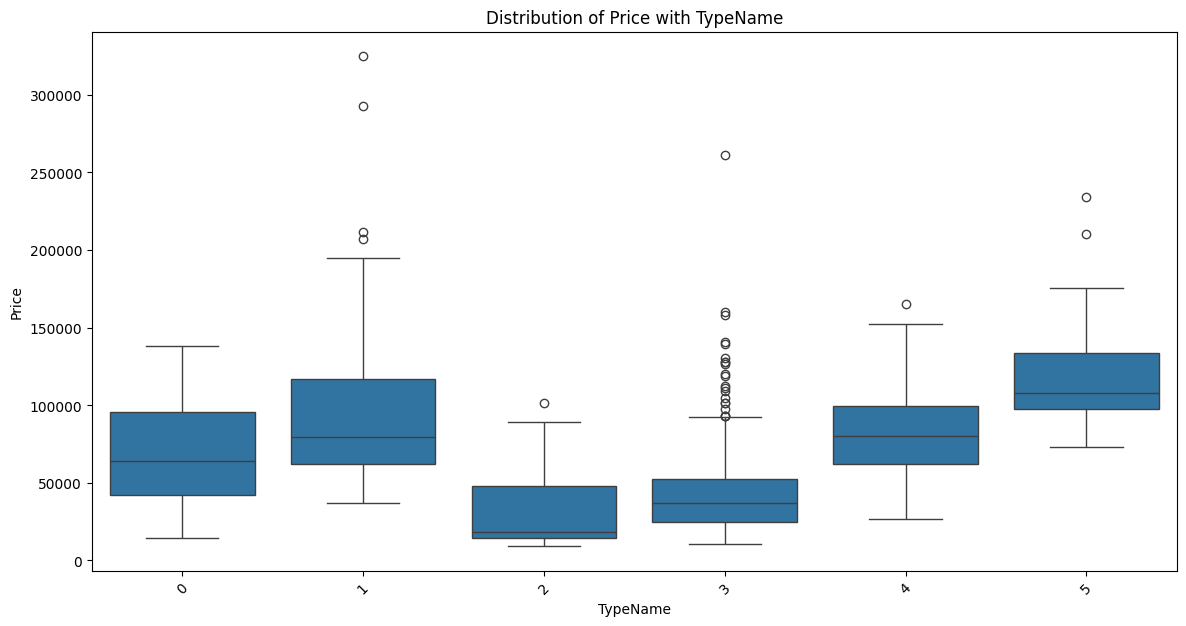

In [96]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='TypeName', y='Price')
plt.title('Distribution of Price with TypeName')
plt.xlabel('TypeName')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()